# Machine Learning-Based Liver Disorder Prediction: Towards Early Detection and Diagnosis

## Problem
Liver disorders pose a significant health burden worldwide, leading to increased morbidity and mortality rates. Early detection and accurate diagnosis of liver disorders are crucial for effective treatment and improved patient outcomes. However, the complexity and diverse etiologies of liver disorders make their diagnosis challenging for clinicians. Therefore, there is a pressing need for the development of reliable and efficient predictive models using machine learning techniques to aid in the early identification and prediction of liver disorders.

## Objective 
The objective of this study is to develop a machine learning-based predictive model for the early detection and prediction of liver disorders.

__Data Source:__
https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [27]:
# Load libraries
import numpy as np 
import pandas as pd
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [28]:
# Load dataset
data = pd.read_csv("../data/indian_liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploring Data 

In [29]:
# check shape of data 
data.shape

(583, 11)

In [30]:
# dtypes 
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Outcome                         int64
dtype: object

In [31]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [33]:
data['Outcome'] = data['Outcome'].astype(object)

In [34]:
# check missing data 
data.isnull().sum() 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Outcome                       0
dtype: int64

## Descriptive statistics

In [35]:
# select numeric data 
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head() 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [36]:
# summary statistics of numerical variables 
rp.summary_cont(num_cols[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,583.0,44.7461,16.1898,0.6705,43.4292,46.0631
1,Total_Bilirubin,583.0,3.2988,6.2095,0.2572,2.7937,3.8039
2,Direct_Bilirubin,583.0,1.4861,2.8085,0.1163,1.2577,1.7146
3,Alkaline_Phosphotase,583.0,290.5763,242.9380,10.0615,270.8151,310.3375
4,Alamine_Aminotransferase,583.0,80.7136,182.6204,7.5634,65.8587,95.5684
5,Aspartate_Aminotransferase,583.0,109.9108,288.9185,11.9658,86.4094,133.4122
6,Total_Protiens,583.0,6.4832,1.0855,0.0450,6.3949,6.5715
7,Albumin,583.0,3.1419,0.7955,0.0329,3.0771,3.2066
8,Albumin_and_Globulin_Ratio,579.0,0.9471,0.3196,0.0133,0.9210,0.9732


In [38]:
# select categorical data 
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head() 

,Gender,Outcome
0,Female,1
1,Male,1
2,Male,1
3,Male,1
4,Male,1


In [39]:
# summary statistics of categorical variables 
rp.summary_cat(cat_cols[['Gender', 'Outcome']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,Gender,Male,441,75.64
1,,Female,142,24.36
2,Outcome,1,416,71.36
3,,2,167,28.64


## Correlations between Variables 

In [40]:
# correlation: Pearson’s by default 
data.corr(method='pearson')

C:\Users\JHossain\AppData\Local\Temp\ipykernel_19768\427603040.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000


## Skewness 

In [41]:
# skew 
data.skew() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_19768\942340472.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Age                           -0.029385
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.992299
Outcome                        0.947140
dtype: float64

## Data visualizations

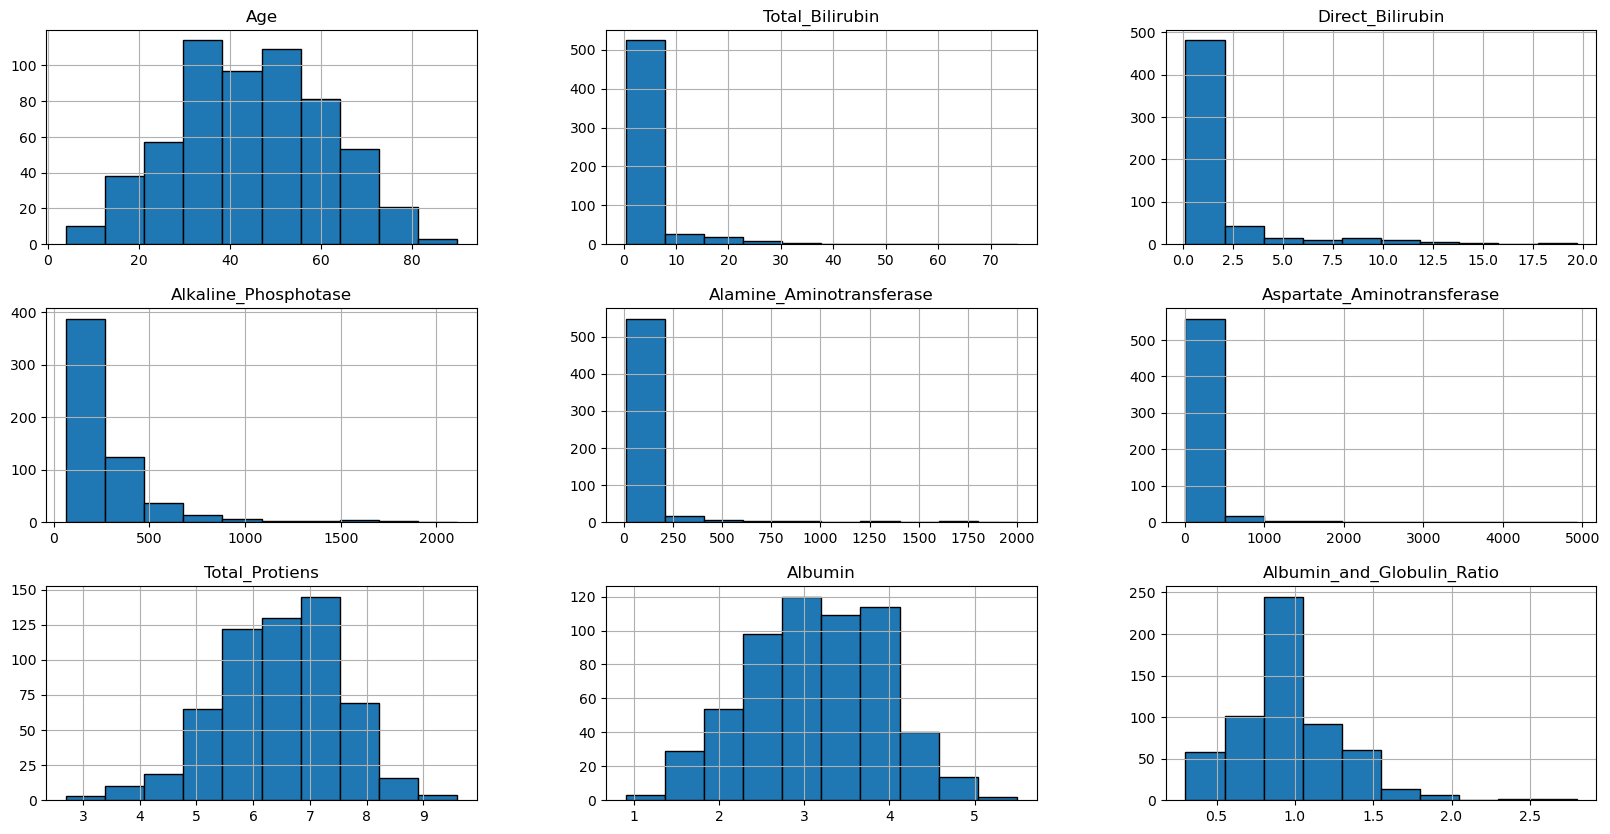

In [42]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show() 

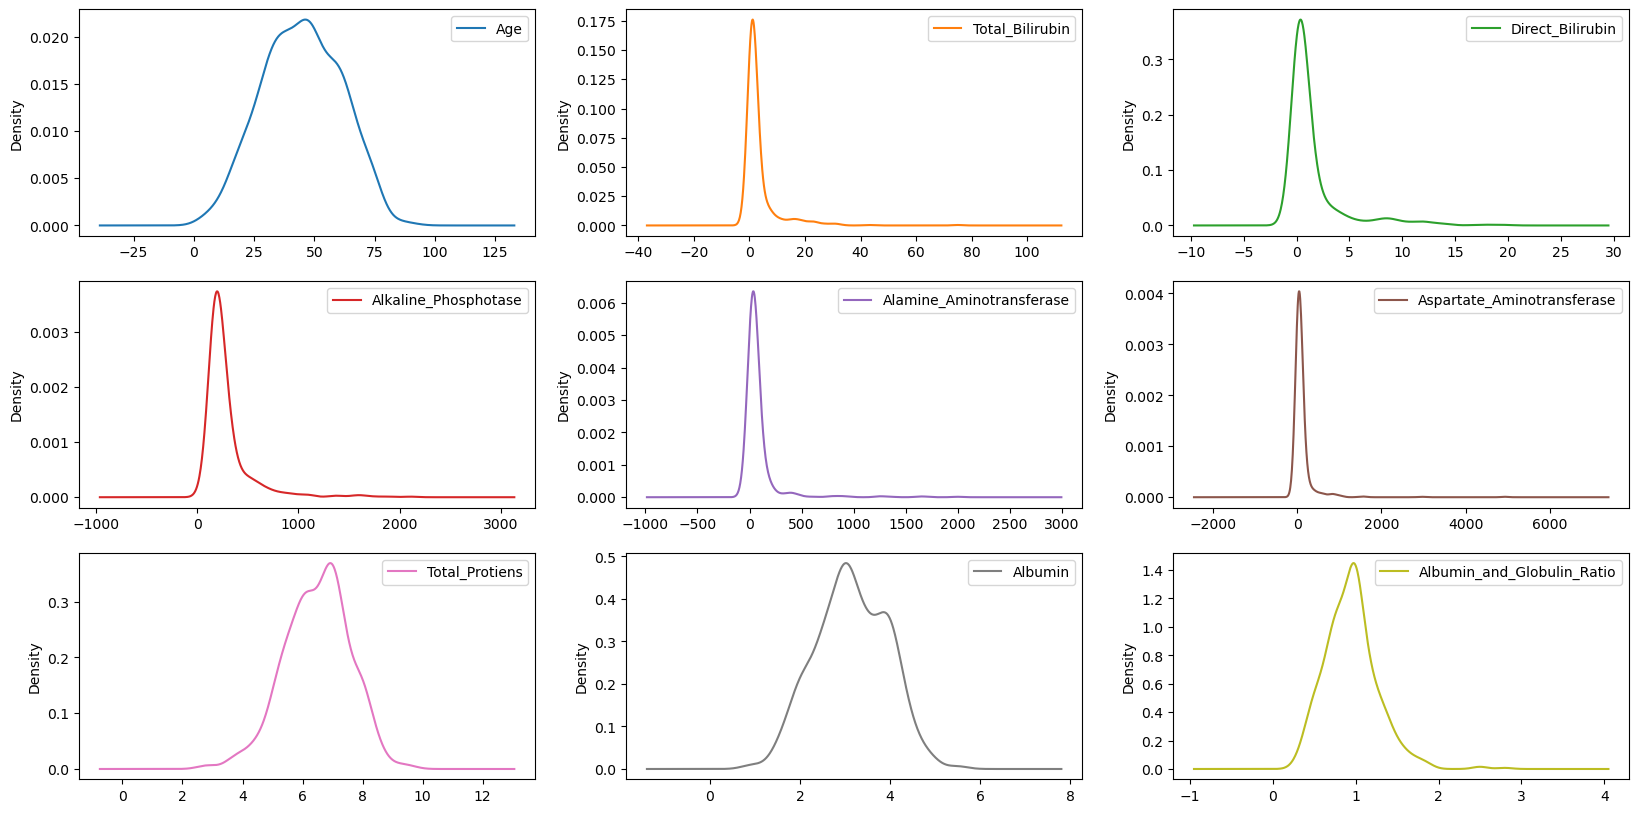

In [43]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(3,3))
plt.show() 

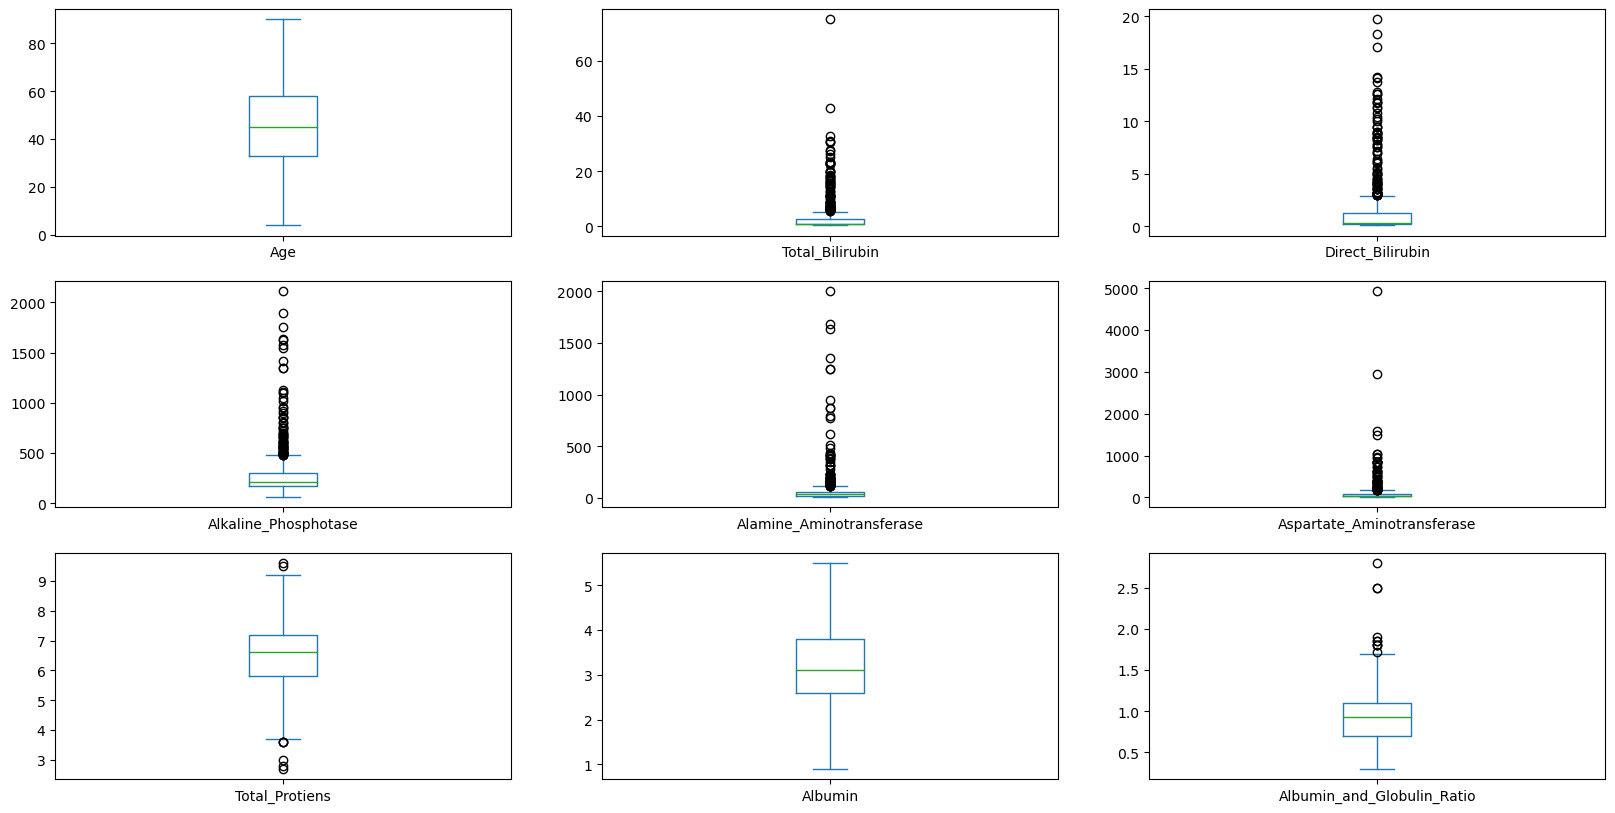

In [44]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(3,3))
plt.show() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_19768\4023993825.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


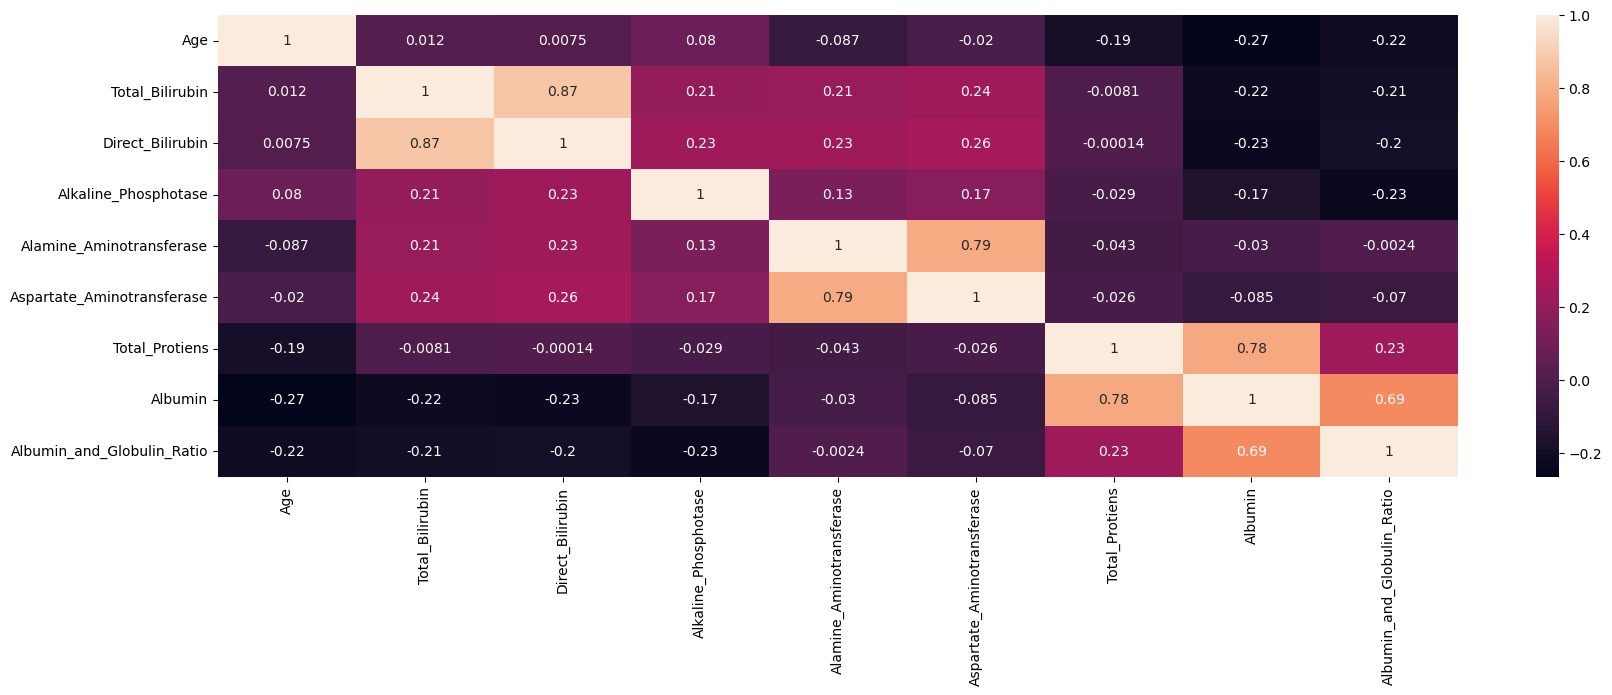

In [45]:
# Multivariate plots with correlations 
plt.figure(figsize=(20,6))
corr = data.corr() 
sns.heatmap(corr, annot=True)
plt.show()

## Setup 

In [46]:
# exmine first few rows of data 
data.head() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [47]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'Outcome', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(583, 11)"
5,Transformed data shape,"(583, 11)"
6,Transformed train set shape,"(408, 11)"
7,Transformed test set shape,"(175, 11)"
8,Ordinal features,1
9,Numeric features,9


## Compare Models 

In [48]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7133,0.7275,0.2144,0.4688,0.2851,0.1487,0.1644,0.9860
dummy,Dummy Classifier,0.7133,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4000
et,Extra Trees Classifier,0.7109,0.7232,0.2561,0.4951,0.3326,0.1735,0.1902,0.4540
ada,Ada Boost Classifier,0.7107,0.7245,0.3856,0.4792,0.4186,0.2354,0.2402,0.4120
ridge,Ridge Classifier,0.7084,0.0000,0.0515,0.2000,0.0810,0.0302,0.0328,0.3890
lda,Linear Discriminant Analysis,0.7035,0.7020,0.0848,0.3000,0.1317,0.0459,0.0543,0.3950
lightgbm,Light Gradient Boosting Machine,0.7009,0.6985,0.3591,0.4820,0.4020,0.2126,0.2206,0.5030
rf,Random Forest Classifier,0.6888,0.6992,0.2227,0.4330,0.2818,0.1140,0.1284,0.4490
svm,SVM - Linear Kernel,0.6865,0.0000,0.1598,0.2006,0.1632,0.0548,0.0566,0.3830
gbc,Gradient Boosting Classifier,0.6813,0.6986,0.2508,0.4298,0.3047,0.1196,0.1324,0.4300


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

## Create Model 

In [49]:
# create model 
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7317,0.6303,0.4545,0.5000,0.4762,0.2964,0.2970
1,0.6341,0.7213,0.0000,0.0000,0.0000,-0.1326,-0.1807
2,0.7805,0.7845,0.3333,0.8000,0.4706,0.3605,0.4155
3,0.7561,0.7500,0.3333,0.6667,0.4444,0.3098,0.3403
4,0.6829,0.6695,0.1667,0.4000,0.2353,0.0763,0.0879
5,0.7073,0.6638,0.1667,0.5000,0.2500,0.1214,0.1498
6,0.6585,0.6149,0.0833,0.2500,0.1250,-0.0250,-0.0308
7,0.7317,0.8075,0.3333,0.5714,0.4211,0.2619,0.2780
8,0.7000,0.8370,0.0909,0.3333,0.1429,0.0283,0.0372


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
# print model parameters
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Tune Model 

In [51]:
# tune hyperparameters of rf
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7805,0.6636,0.2727,0.7500,0.4000,0.2998,0.3575
1,0.6341,0.7241,0.0000,0.0000,0.0000,-0.1326,-0.1807
2,0.7805,0.8046,0.3333,0.8000,0.4706,0.3605,0.4155
3,0.7805,0.7414,0.3333,0.8000,0.4706,0.3605,0.4155
4,0.6585,0.6466,0.0833,0.2500,0.1250,-0.0250,-0.0308
5,0.7317,0.6580,0.1667,0.6667,0.2667,0.1694,0.2309
6,0.6341,0.5920,0.0833,0.2000,0.1176,-0.0659,-0.0759
7,0.7561,0.7989,0.3333,0.6667,0.4444,0.3098,0.3403
8,0.7000,0.8558,0.0000,0.0000,0.0000,-0.0480,-0.0986


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [52]:
# to access the tuner object you can set return_tuner = True
tuned_lr, tuner = tune_model(lr, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7805,0.6636,0.2727,0.7500,0.4000,0.2998,0.3575
1,0.6341,0.7241,0.0000,0.0000,0.0000,-0.1326,-0.1807
2,0.7805,0.8046,0.3333,0.8000,0.4706,0.3605,0.4155
3,0.7805,0.7414,0.3333,0.8000,0.4706,0.3605,0.4155
4,0.6585,0.6466,0.0833,0.2500,0.1250,-0.0250,-0.0308
5,0.7317,0.6580,0.1667,0.6667,0.2667,0.1694,0.2309
6,0.6341,0.5920,0.0833,0.2000,0.1176,-0.0659,-0.0759
7,0.7561,0.7989,0.3333,0.6667,0.4444,0.3098,0.3403
8,0.7000,0.8558,0.0000,0.0000,0.0000,-0.0480,-0.0986


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [53]:
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=No...
                   param_distributions={'actual_estimator__C': [0.001, 0.002,
                                                                0.003, 0.004,
                                                                0.005, 0.006,
                                                                0.007, 0.008,
                                                                0.009, 0.01,
                                                                0.011, 0.012,
                                                                0.013, 0.014,
                                                                0.015, 0.016,
                                                                0.017, 0.018,
                                                                0.019, 0.02,
                                                                0.021, 0.022,
                                                                0.023, 0.024,
                                                                0.025, 0.026,
                                                                0.027, 0.028,
                                                                0.029, 0.03, ...],
                                        'actual_estimator__class_weight': ['balanced',
                                                                           {}]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

## Analyze Model 

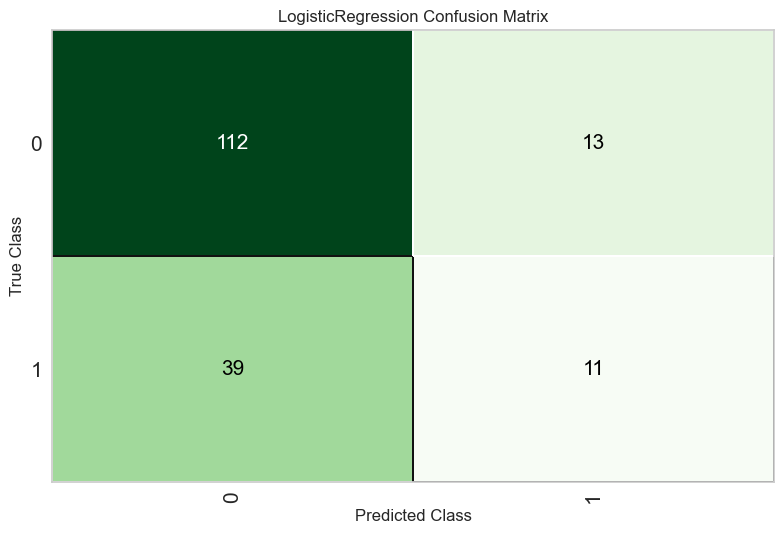

In [55]:
# plot confusion matrix
plot_model(lr, plot = 'confusion_matrix')

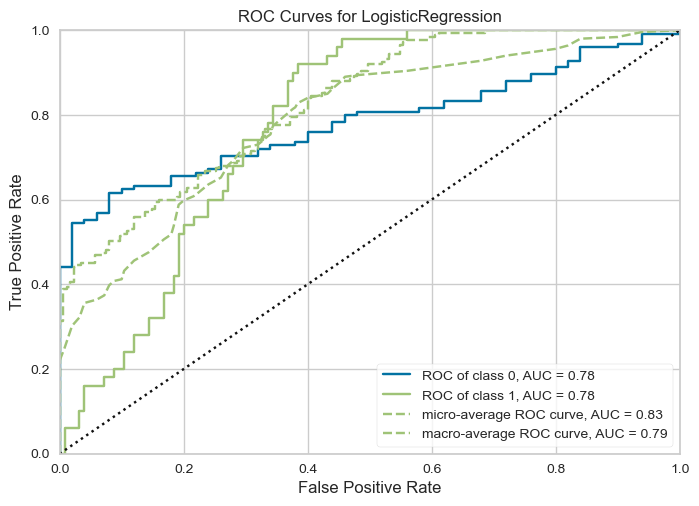

In [56]:
# plot AUC
plot_model(lr, plot = 'auc')

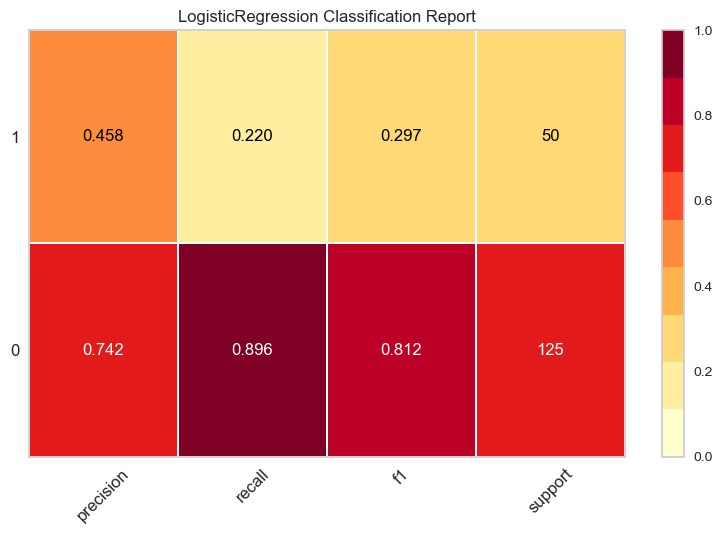

In [57]:
# plot class report
plot_model(lr, plot = 'class_report')

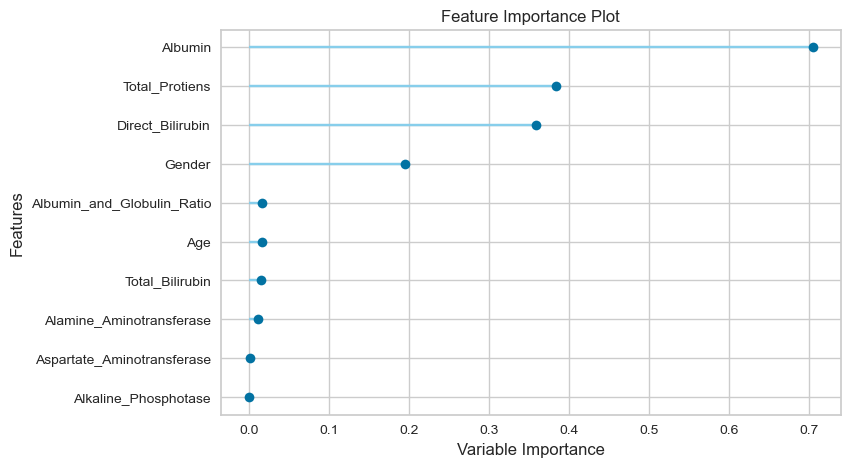

In [58]:
# plot feature importance
plot_model(lr, plot = 'feature')

## Evaluate Model 

In [59]:
# evaluate model 
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [60]:
# finalize a model
finalize_model(lr)

Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Total_Bilirubin',
                                             'Direct_Bilirubin',
                                             'Alkaline_Phosphotase',
                                             'Alamine_Aminotransferase',
                                             'Asp...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}],
                                                               return_df=True,
                                                               verbose=0))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

## Prediction

In [61]:
# predict on test set
holdout_pred = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7029,0.7816,0.2200,0.4583,0.2973,0.1374,0.1523


In [62]:
# show predictions df
holdout_pred.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome,prediction_label,prediction_score
532,62,Male,0.7,0.2,162,12,17,8.2,3.2,0.6,1,1,0.7702
406,45,Male,0.7,0.2,180,18,58,6.7,3.7,1.2,1,1,0.5262
350,37,Male,1.8,0.8,145,62,58,5.7,2.9,1.0,0,1,0.7040
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.4,0,1,0.8988
543,40,Male,1.2,0.6,204,23,27,7.6,4.0,1.1,0,1,0.5881


In [63]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('Outcome', axis=1, inplace=True)
new_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [64]:
# predict model on new_data
predictions = predict_model(lr, data = new_data)
predictions.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,prediction_label,prediction_score
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0.6171
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0.9816
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0.9507
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0.6395
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0.9249


## Save Model 

In [65]:
# save pipeline
save_model(lr, '../models/liver_disorder')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Total_Bilirubin',
                                              'Direct_Bilirubin',
                                              'Alkaline_Phosphotase',
                                              'Alamine_Aminotransferase',
                                              'Asp...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Female    0
 Male      1
 NaN      -1
 dtype: int64}],
                                                              

In [66]:
# load pipeline
loaded_best_pipeline = load_model('../models/liver_disorder')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Total_Bilirubin',
                                             'Direct_Bilirubin',
                                             'Alkaline_Phosphotase',
                                             'Alamine_Aminotransferase',
                                             'Asp...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}],
                                                               return_df=True,
                                                               verbose=0))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)